In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:

dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#if the customer is exit the bank or not
#divide the dataset into independent and dependent
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]


In [ ]:

X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:


y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [ ]:

#feature engg
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
X=pd.concat([X,geography,gender], axis = 1)

In [ ]:
X.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,France,Female,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,False,True,False


In [ ]:
X['Spain'] = X['Spain'].astype(int)

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,False,0,False
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,False,1,False
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,False,0,False
3,699,France,Female,39,1,0.00,2,0,0,93826.63,False,0,False
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,False,1,False


In [ ]:
X['Germany'] = X['Germany'].astype(int)

In [ ]:

X['Male'] = X['Male'].astype(int)

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
X.drop(['Geography', 'Gender'], axis=1, inplace=True)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:

X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
X_train.shape

(8000, 11)

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
#initialize the ann
classifier = Sequential()


In [ ]:

#adding the input layer
classifier.add(Dense(units = 11, activation = 'relu'))

In [ ]:


#adding the first hidden layer
classifier.add(Dense(units = 7, activation='relu'))

In [ ]:

#adding the second hidden layer
classifier.add(Dense(units = 6, activation='relu'))

In [ ]:
#adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [ ]:


classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:

import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [ ]:
# early stopping keras
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [ ]:
model_history = classifier.fit(X_train, y_train, validation_split = 0.33, batch_size = 10, epochs = 1000, callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8685 - loss: 0.3039 - val_accuracy: 0.8482 - val_loss: 0.3734
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8695 - loss: 0.3116 - val_accuracy: 0.8482 - val_loss: 0.3731
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8665 - loss: 0.3125 - val_accuracy: 0.8501 - val_loss: 0.3700
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8679 - loss: 0.3095 - val_accuracy: 0.8504 - val_loss: 0.3740
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8751 - loss: 0.2961 - val_accuracy: 0.8485 - val_loss: 0.3733
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8671 - loss: 0.3086 - val_accuracy: 0.8485 - val_loss: 0.3714
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8706 - loss: 0.3057 - val_accuracy: 0.8493 - val_loss: 0.3714
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8668 - loss: 0.3176 - 

In [ ]:
model_history.history.keys()



dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

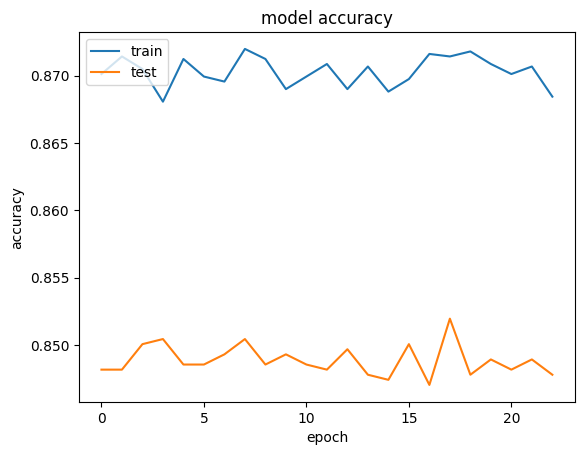

In [ ]:
#summary history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

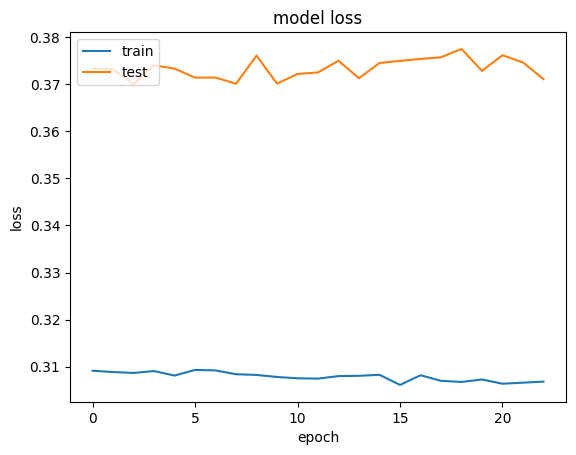

In [ ]:
#summary for the loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

In [ ]:
# making the prediction
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [ ]:
#make the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1505,   90],
       [ 208,  197]])

In [ ]:
# calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.851

In [ ]:
# get the weights
classifier.get_weights()

[array([[-1.18898056e-01, -1.03314333e-01, -1.62168294e-01,
          2.05651507e-01, -1.82238951e-01,  3.40822488e-01,
         -6.45624250e-02,  1.14793777e-01,  5.59585690e-01,
         -5.43996505e-02,  5.38079850e-02],
        [-5.06258011e-02, -3.18437666e-02,  7.74779797e-01,
         -9.40707803e-01,  2.91590244e-01,  1.81045979e-01,
          3.08257788e-01, -2.04609022e-01,  5.99476337e-01,
          6.72114968e-01, -3.61253142e-01],
        [ 2.08611451e-02,  8.90286341e-02, -4.05549169e-01,
          3.99656966e-02,  1.67639658e-01,  5.59732914e-02,
          5.67654483e-02,  2.45565712e-01,  1.69860572e-01,
         -1.17894951e-02,  9.48678628e-02],
        [ 5.31777322e-01, -9.39356148e-01, -5.87148249e-01,
          1.47240087e-01, -8.45963508e-02,  5.86201847e-01,
         -3.85784030e-01, -5.90579212e-01, -9.94245559e-02,
          1.37795314e-01, -8.27805102e-01],
        [-9.12015140e-01, -9.54835057e-01, -7.27776110e-01,
         -2.91952819e-01, -1.79449692e-01, -